# WeatherPy

In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

## Generating Random Cities

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

## Making an API Request from OpenWeatherMap

In [5]:
# import dependencies
import requests
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters. (record count is what city we are on in the set, 1-50 and set count is what set of 50 we are on)
record_count = 1
set_count = 1


# Loop through all the cities in the list. (Enumerate allows us to retrieve both index and city from the list)
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city. (city.replace is replacing empty string after &g= with the city name in the cities list)
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sabzevar
Processing Record 2 of Set 1 | mizdah
Processing Record 3 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 4 of Set 1 | iqaluit
Processing Record 5 of Set 1 | roma
Processing Record 6 of Set 1 | georgetown
Processing Record 7 of Set 1 | katsuura
Processing Record 8 of Set 1 | carnarvon
Processing Record 9 of Set 1 | guozhen
Processing Record 10 of Set 1 | novyy urengoy
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | abeche
Processing Record 14 of Set 1 | barrow
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | san rafael
Processing Record 17 of Set 1 | xai-xai
Processing Record 18 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 19 of Set 1 | bambous virieux
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 

Processing Record 39 of Set 4 | cabo san lucas
Processing Record 40 of Set 4 | merauke
Processing Record 41 of Set 4 | salinopolis
Processing Record 42 of Set 4 | college
Processing Record 43 of Set 4 | simao
Processing Record 44 of Set 4 | hami
Processing Record 45 of Set 4 | pueblo
Processing Record 46 of Set 4 | aliwal north
Processing Record 47 of Set 4 | batagay-alyta
Processing Record 48 of Set 4 | hovd
Processing Record 49 of Set 4 | point fortin
Processing Record 50 of Set 4 | camocim
Processing Record 1 of Set 5 | lazaro cardenas
Processing Record 2 of Set 5 | mahon
Processing Record 3 of Set 5 | bosaso
Processing Record 4 of Set 5 | yulara
Processing Record 5 of Set 5 | doha
Processing Record 6 of Set 5 | hambantota
Processing Record 7 of Set 5 | kavieng
Processing Record 8 of Set 5 | klaksvik
Processing Record 9 of Set 5 | kupang
Processing Record 10 of Set 5 | boende
Processing Record 11 of Set 5 | kruisfontein
Processing Record 12 of Set 5 | tuatapere
Processing Record 13 

Processing Record 33 of Set 8 | vila franca do campo
Processing Record 34 of Set 8 | hobyo
Processing Record 35 of Set 8 | ures
Processing Record 36 of Set 8 | vestmannaeyjar
Processing Record 37 of Set 8 | lalomanu
City not found. Skipping...
Processing Record 38 of Set 8 | ordzhonikidze
Processing Record 39 of Set 8 | les cayes
Processing Record 40 of Set 8 | silyanah
City not found. Skipping...
Processing Record 41 of Set 8 | zhigansk
Processing Record 42 of Set 8 | port shepstone
Processing Record 43 of Set 8 | jiblah
Processing Record 44 of Set 8 | tommot
Processing Record 45 of Set 8 | guangyuan
Processing Record 46 of Set 8 | touros
Processing Record 47 of Set 8 | talnakh
Processing Record 48 of Set 8 | walvis bay
Processing Record 49 of Set 8 | bridgewater
Processing Record 50 of Set 8 | faya
Processing Record 1 of Set 9 | kawana waters
City not found. Skipping...
Processing Record 2 of Set 9 | baturyn
Processing Record 3 of Set 9 | vestbygda
City not found. Skipping...
Process

Processing Record 17 of Set 12 | port macquarie
Processing Record 18 of Set 12 | coronado
Processing Record 19 of Set 12 | clarence town
Processing Record 20 of Set 12 | manta
Processing Record 21 of Set 12 | bayonet point
Processing Record 22 of Set 12 | tetouan
Processing Record 23 of Set 12 | baglung
Processing Record 24 of Set 12 | tupancireta
Processing Record 25 of Set 12 | tostamaa
City not found. Skipping...
Processing Record 26 of Set 12 | lucapa
Processing Record 27 of Set 12 | salamiyah
Processing Record 28 of Set 12 | hay river
Processing Record 29 of Set 12 | xiangxiang
Processing Record 30 of Set 12 | severnoye
Processing Record 31 of Set 12 | tateyama
Processing Record 32 of Set 12 | fortuna
Processing Record 33 of Set 12 | dabhol
Processing Record 34 of Set 12 | williston
Processing Record 35 of Set 12 | quesnel
Processing Record 36 of Set 12 | sioux lookout
Processing Record 37 of Set 12 | alihe
Processing Record 38 of Set 12 | lieksa
Processing Record 39 of Set 12 | n

In [9]:
len(city_data)

565

## Convert list to dataframe

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sabzevar,36.2126,57.6819,30.88,43,0,1.52,IR,2022-01-22 21:21:28
1,Mizdah,31.4451,12.9801,45.86,73,0,8.12,LY,2022-01-22 21:21:29
2,Iqaluit,63.7506,-68.5145,4.73,65,100,8.99,CA,2022-01-22 21:21:29
3,Roma,43.2128,-75.4557,25.66,46,0,6.91,US,2022-01-22 21:20:40
4,Georgetown,5.4112,100.3354,80.89,85,20,2.30,MY,2022-01-22 21:21:29
5,Katsuura,35.1333,140.3000,39.31,57,94,8.30,JP,2022-01-22 21:21:30
6,Carnarvon,-24.8667,113.6333,77.07,73,32,4.61,AU,2022-01-22 21:21:30
7,Guozhen,34.3659,107.3590,31.62,95,99,1.01,CN,2022-01-22 21:21:30
8,Novyy Urengoy,66.0833,76.6333,13.95,95,100,10.87,RU,2022-01-22 21:21:31
9,Mataura,-46.1927,168.8643,55.47,61,97,6.08,NZ,2022-01-22 21:21:31


In [12]:
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Sabzevar,IR,2022-01-22 21:21:28,36.2126,57.6819,30.88,43,0,1.52
1,Mizdah,LY,2022-01-22 21:21:29,31.4451,12.9801,45.86,73,0,8.12
2,Iqaluit,CA,2022-01-22 21:21:29,63.7506,-68.5145,4.73,65,100,8.99
3,Roma,US,2022-01-22 21:20:40,43.2128,-75.4557,25.66,46,0,6.91
4,Georgetown,MY,2022-01-22 21:21:29,5.4112,100.3354,80.89,85,20,2.30
5,Katsuura,JP,2022-01-22 21:21:30,35.1333,140.3000,39.31,57,94,8.30
6,Carnarvon,AU,2022-01-22 21:21:30,-24.8667,113.6333,77.07,73,32,4.61
7,Guozhen,CN,2022-01-22 21:21:30,34.3659,107.3590,31.62,95,99,1.01
8,Novyy Urengoy,RU,2022-01-22 21:21:31,66.0833,76.6333,13.95,95,100,10.87
9,Mataura,NZ,2022-01-22 21:21:31,-46.1927,168.8643,55.47,61,97,6.08


### Save to a csv

In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

## Plotting the data

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

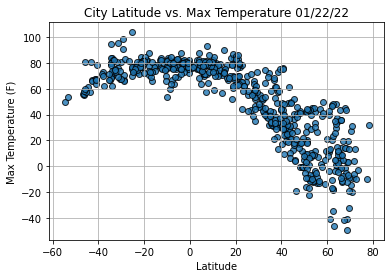

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

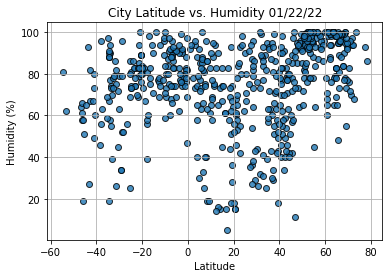

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

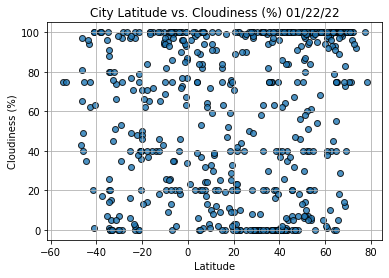

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

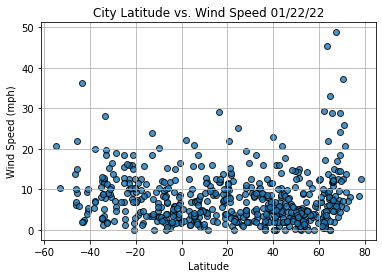

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()